# Predicting Heart Disease Using Machine Learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

by:

1. Fikri Adyatma (235150201111015)

2. Nadhif Rif’at Rasendriya (235150201111074)

3. Reyno Benedict (235150207111048)

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a Statement,
> Given clinical parameters about a patient, can we predict whether or not they have a disease

## 2. Data

Available on Kaggle :
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> if we can reach 95% of accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

# 4. Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
  - serum = LDL + HDL + .2 * triglycerides
  - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  - 0: Nothing to note
  - 1: ST-T Wave abnormality
    - can range from mild symptoms to severe problems
    - signals non-normal heart beat
  - 2: Possible or definite left ventricular hypertrophy
    - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
  - 0: Upsloping: better heart rate with excercise (uncommon)
  - 1: Flatsloping: minimal change (typical healthy heart)
  - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
  - colored vessel means the doctor can see the blood passing through
  - the more blood movement the better (no clots)
13. thal - thalium stress result
  - 1,3: normal
  - 6: fixed defect: used to be defect but ok now
  - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


# Preparing the **tools**

In [ ]:
# import import
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
# load data
df = pd.read_csv("heart.csv")
df.shape # (rows, columns)

(1025, 14)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


* **age**
  Usia pasien dalam tahun.

* **sex**
  Jenis kelamin pasien.
  (0 = perempuan, 1 = laki-laki)

* **cp**
  Jenis nyeri dada (chest pain type).
  0 = typical angina,
  1 = atypical angina,
  2 = non-anginal pain,
  3 = asymptomatic.

* **trestbps**
  Tekanan darah saat istirahat (dalam mm Hg).

* **chol**
  Kadar kolesterol serum dalam darah (mg/dl).

* **fbs**
  Kadar gula darah puasa lebih dari 120 mg/dl.
  (1 = ya, 0 = tidak)

* **restecg**
  Hasil elektrokardiogram saat istirahat.
  0 = normal,
  1 = ST-T wave abnormality,
  2 = left ventricular hypertrophy.

* **thalach**
  Detak jantung maksimum yang dicapai selama uji latihan.

* **exang**
  Apakah ada angina (nyeri dada) yang diinduksi oleh olahraga.
  (1 = ya, 0 = tidak)

* **oldpeak**
  Penurunan segmen ST akibat aktivitas fisik dibandingkan saat istirahat (indikasi iskemia).

* **slope**
  Kemiringan segmen ST saat puncak latihan.
  0 = upsloping,
  1 = flat,
  2 = downsloping.

* **ca**
  Jumlah pembuluh darah besar (0–3) yang terlihat melalui fluoroskopi.

* **thal**
  Jenis kelainan thalassemia.
  1 = normal,
  2 = fixed defect,
  3 = reversible defect.

* **target**
  Diagnosis akhir apakah pasien memiliki penyakit jantung atau tidak.
  0 = tidak ada penyakit jantung,
  1 = memiliki penyakit jantung.



#Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?

  0: Typical angina: chest pain related to decreased blood supply to the heart.

  1: Atypical angina: chest pain not related to the heart.

  2: Non-anginal pain: typically esophageal spasms (non-heart related).

  3: Asymptomatic: chest pain not showing signs of disease.
  
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# hitung ada bereapa banyak elemen dalam kategori
df["target"].value_counts()

,count
target,
1,526
0,499


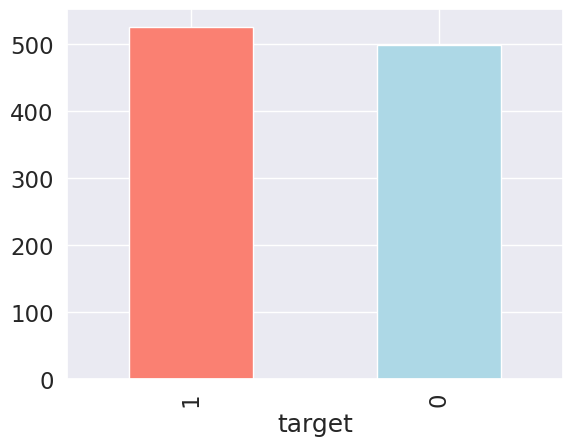

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Apa ada data Kosong?
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Cek Disease berdasarkan Jenis Kelamin

In [ ]:
df.sex.value_counts()

,count
sex,
1,713
0,312


In [ ]:
# Compare target & gender
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


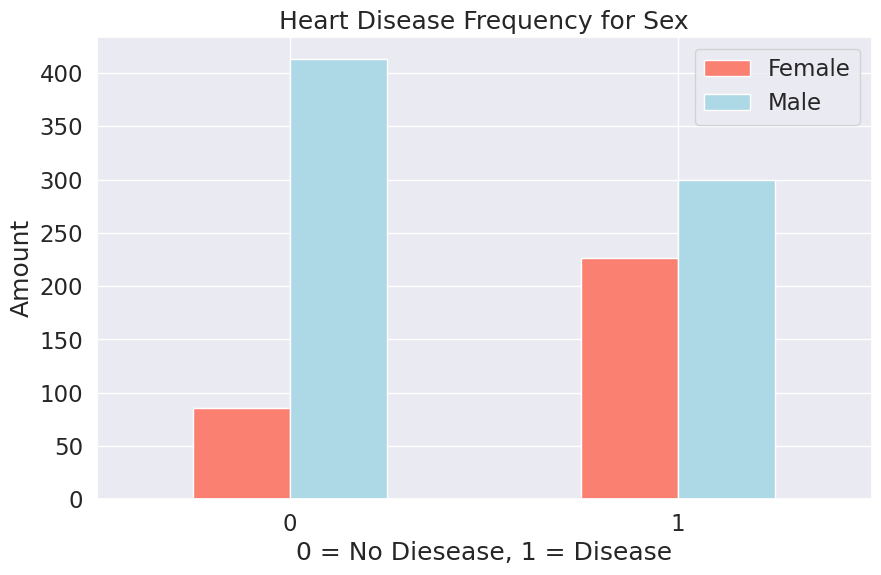

In [ ]:
# plotting crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease

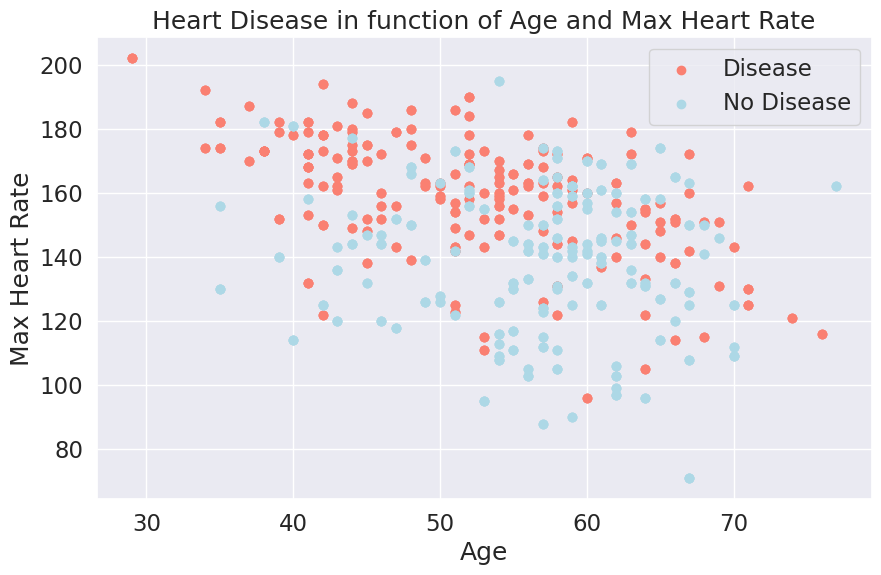

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

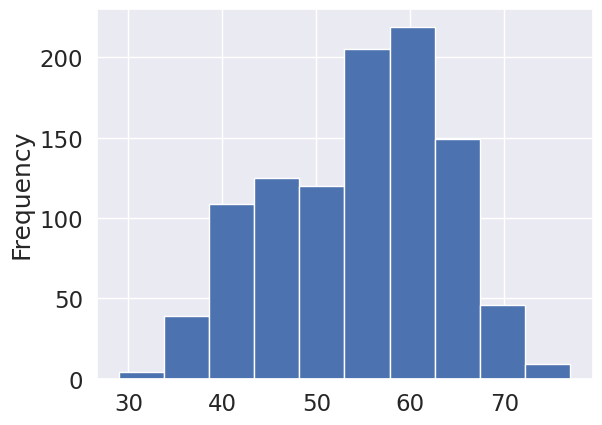

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


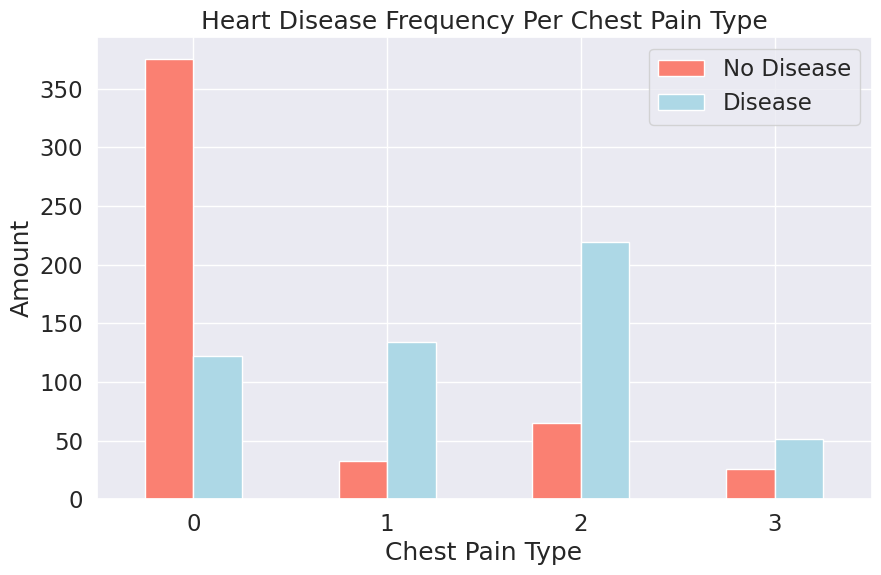

In [ ]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

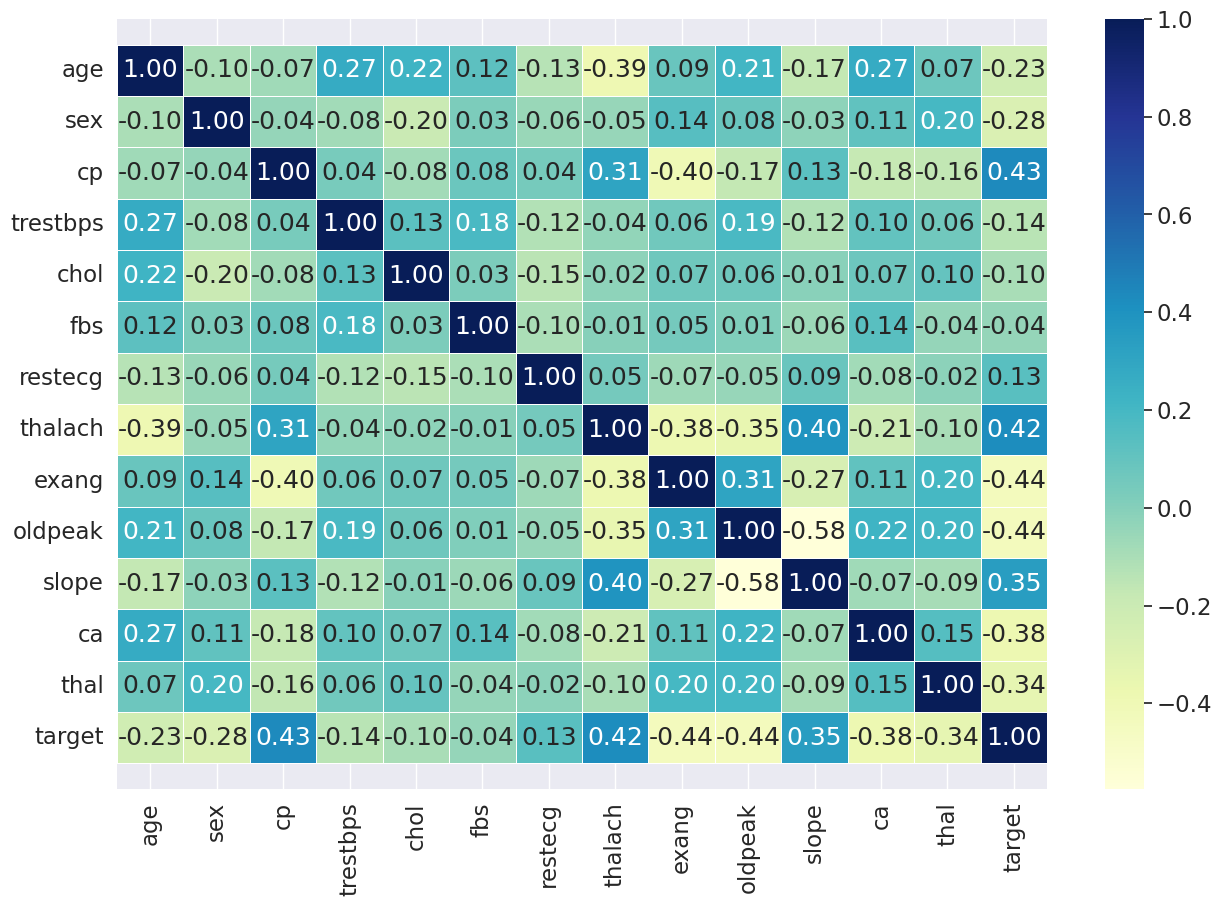

In [ ]:
# Let's make our correlation matrix a little prettier :)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 5. Modeling

In [ ]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [ ]:
# Split data into train and test sets (80:20)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2) # 20% for test

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [ ]:
y_train, len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

# Supervised Learning


In [ ]:
# model pada Dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

## Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_model = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_model, X_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression")
print(f"Mean Accuracy: {log_scores.mean():.4f}")
print(f"Standard Deviation: {log_scores.std():.4f}")

Logistic Regression
Mean Accuracy: 0.8459
Standard Deviation: 0.0279


### Penjelasan Cara Kerja Logistic Regression

### Tujuan:

Memprediksi probabilitas dari suatu kelas (misalnya: punya penyakit jantung atau tidak).

### Cara Kerja:

* Logistic Regression adalah model **linier** yang digunakan untuk **klasifikasi**, bukan regresi (meskipun namanya "regression").
* Menghitung **kombinasi linier** dari fitur:

  $$
  z = w_1x_1 + w_2x_2 + ... + w_nx_n + b
  $$
* Lalu menerapkan fungsi **sigmoid** untuk mengubah hasilnya ke dalam bentuk **probabilitas** antara 0 dan 1:

  $$
  \text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
  $$
* Jika probabilitas > 0.5, maka diprediksi sebagai kelas 1, jika tidak, kelas 0.

### Kelebihan:

* Cepat, sederhana, dan cukup efektif untuk dataset linier.
* Bisa memberikan probabilitas klasifikasi (bukan hanya label).

### Kekurangan:

* Kurang efektif jika hubungan antara fitur dan label tidak linier.
* Rentan terhadap outlier.




## K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_scaled, y, cv=5, scoring='accuracy')


print("K-Nearest Neighbors")
print(f"Mean Accuracy: {knn_scores.mean():.4f}")
print(f"Standard Deviation: {knn_scores.std():.4f}")

K-Nearest Neighbors
Mean Accuracy: 0.8332
Standard Deviation: 0.0181


### Penjelasan Cara Kerja K-Nearest Neighbors (KNN)

### Tujuan:

Klasifikasi berdasarkan **kemiripan** data baru dengan data yang sudah ada.

### Cara Kerja:

* Untuk mengklasifikasikan satu data baru, KNN:

  1. Menghitung jarak (misalnya Euclidean) ke semua data dalam training set.
  2. Memilih **k tetangga terdekat** (misalnya k=5).
  3. Menentukan kelas mayoritas dari k tetangga tersebut.
* Tidak ada proses "training" yang nyata — model menyimpan semua data dan melakukan pencarian saat prediksi.

### Kelebihan:

* Mudah dipahami dan diimplementasikan.
* Bagus untuk data dengan pola kompleks.

### Kekurangan:

* **Lambat** jika jumlah data besar (karena harus hitung jarak ke semua titik).
* Sangat sensitif terhadap **scaling** fitur.
* Sulit untuk data dengan **dimensi tinggi** (curse of dimensionality).


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')  # Tanpa scaling

print("Random Forest")
print(f"Mean Accuracy: {rf_scores.mean():.4f}")
print(f"Standard Deviation: {rf_scores.std():.4f}")

Random Forest
Mean Accuracy: 0.9971
Standard Deviation: 0.0059


In [ ]:
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title(f"{name} Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

### Penjelasan Cara Kerja Random Forest

### Tujuan:

Model ensambel untuk klasifikasi yang lebih kuat dan stabil.

### Cara Kerja:

* Random Forest terdiri dari **banyak pohon keputusan (Decision Trees)**.
* Untuk membuat satu pohon:

  1. Ambil **subset acak** dari data (dengan penggantian, disebut *bootstrap*).
  2. Di tiap node, gunakan subset acak dari fitur untuk split terbaik.
* Untuk prediksi:

  * Semua pohon memberikan voting klasifikasi → hasil akhir adalah **kelas mayoritas**.

### Kelebihan:

* **Akurat**, bahkan tanpa banyak tuning.
* Tidak mudah overfitting seperti pohon tunggal.
* Bisa menangani data non-linier dan campuran (numerik + kategorikal).

### Kekurangan:

* Lebih lambat dibanding model sederhana.
* Kurang interpretatif dibanding logistic regression.



In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7804878048780488,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Ringkasan Singkat

| Algoritma           | Sifat          | Kelebihan                                | Kekurangan                                    |
| ------------------- | -------------- | ---------------------------------------- | --------------------------------------------- |
| Logistic Regression | Linier         | Cepat, sederhana, interpretatif          | Tidak cocok untuk data non-linier             |
| K-Nearest Neighbors | Non-parametrik | Mudah dipahami, fleksibel                | Lambat di prediksi, sensitif terhadap scaling |
| Random Forest       | Ensambel       | Akurat, stabil, tangguh terhadap outlier | Kurang interpretatif, relatif lambat          |

# Model Comparison

### Confusion Matrix

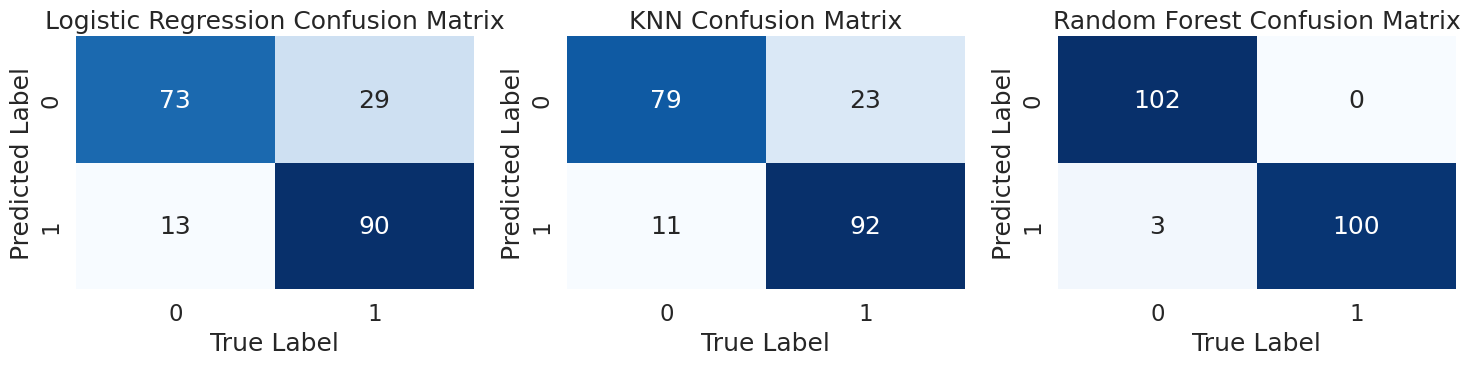

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_rf, X_test_rf = train_test_split(X, test_size=0.2, random_state=42)

model_list = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier())
]

plt.figure(figsize=(15, 4))

for idx, (name, model) in enumerate(model_list, 1):
    if name == "Random Forest":
        model.fit(X_train_rf, y_train)
        y_pred = model.predict(X_test_rf)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(1, 3, idx)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plt.tight_layout()
plt.show()

#### Random Forest

Penjelasan:

- True Negative (TN): 102 → Prediksi = 0, dan memang benar (label asli = 0)

- False Positive (FP): 0 → Prediksi = 1, tapi seharusnya 0

- False Negative (FN): 3 → Prediksi = 0, tapi seharusnya 1

- True Positive (TP): 100 → Prediksi = 1, dan memang benar (label asli = 1)



Model ini sangat baik: tidak ada FP sama sekali, hanya 3 FN.

#### KNN

Penjelasan:

- True Negative (TN): 79 → Benar prediksi negatif

- False Positive (FP): 23 → Salah prediksi positif

- False Negative (FN): 11 → Salah prediksi negatif

- True Positive (TP): 92 → Benar prediksi positif



Performa cukup baik, namun ada:

  - 23 data negatif yang salah dikira positif (FP),

  - dan 11 data positif yang salah dikira negatif (FN).

#### Logistic Regression

Penjelasan:

- True Negative (TN) = 73
→ Model memprediksi 0, dan benar (label asli = 0)

- False Positive (FP) = 29
→ Model memprediksi 1, tapi seharusnya 0

- False Negative (FN) = 13
→ Model memprediksi 0, tapi seharusnya 1

- True Positive (TP) = 90
→ Model memprediksi 1, dan benar (label asli = 1)

### Accuracy, Precision, Recall, F1-Score, ROC & AUC Curve, MCC


Logistic Regression Evaluation Metrics
Confusion Matrix:
[[73 29]
 [13 90]]
Accuracy:  0.7951
Precision: 0.7563
Recall:    0.8738
F1 Score:  0.8108
Matthews Correlation Coefficient (MCC): 0.5973

KNN Evaluation Metrics
Confusion Matrix:
[[79 23]
 [11 92]]
Accuracy:  0.8341
Precision: 0.8000
Recall:    0.8932
F1 Score:  0.8440
Matthews Correlation Coefficient (MCC): 0.6727

Random Forest Evaluation Metrics
Confusion Matrix:
[[102   0]
 [  3 100]]
Accuracy:  0.9854
Precision: 1.0000
Recall:    0.9709
F1 Score:  0.9852
Matthews Correlation Coefficient (MCC): 0.9712


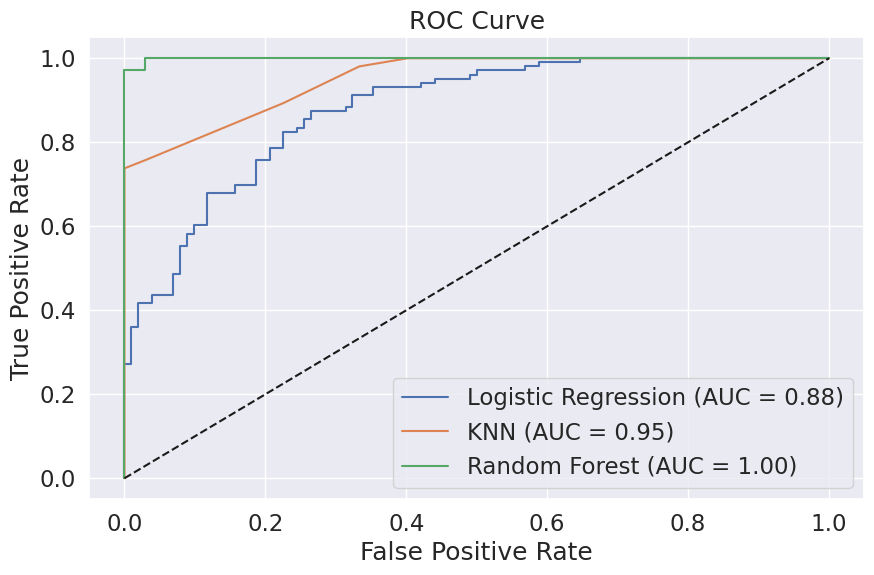

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, matthews_corrcoef
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_list = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier())
]

X_train_rf, X_test_rf = train_test_split(X, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))

for name, model in model_list:
    if name == "Random Forest":
        model.fit(X_train_rf, y_train)
        y_pred = model.predict(X_test_rf)
        y_proba = model.predict_proba(X_test_rf)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Evaluation Metrics")
    print("Confusion Matrix:")
    print(cm)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

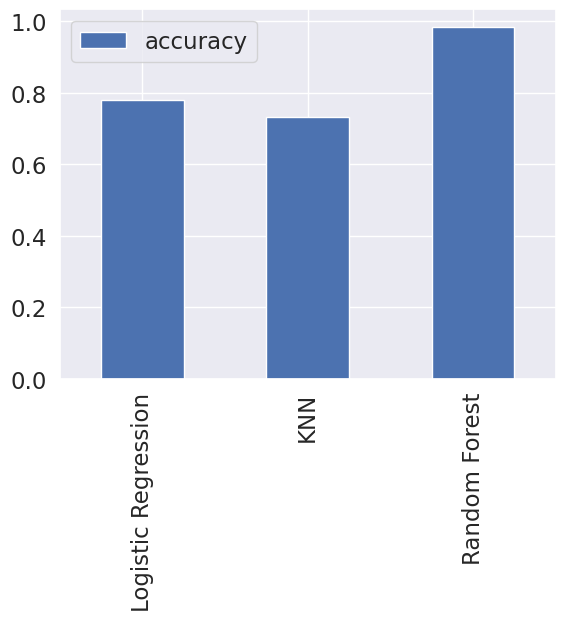

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#### Model Comparison Table

| Metric                        | Logistic Regression | K-Nearest Neighbors | Random Forest  |
| ----------------------------- | ------------------- | ------------------- | -------------- |
| **Accuracy**                  | 0.7951              | 0.8341              | **0.9854**     |
| **Precision**                 | 0.7563              | 0.8000              | **1.0000**     |
| **Recall**                    | 0.8738              | 0.8932              | **0.9709**     |
| **F1 Score**                  | 0.8108              | 0.8440              | **0.9852**     |
| **Matthews Corr. Coef (MCC)** | 0.5973              | 0.6727              | **0.9712**     |








### Kesimpulan Sementara dari Model Comparison pada Supervised Learning

1. **Random Forest** mengungguli dua model lainnya **secara signifikan di semua metrik**.

   * F1 Score dan MCC sangat tinggi, menandakan performa stabil bahkan untuk data yang imbalance.
   * Precision = 1.0 artinya **tidak ada false positive sama sekali**.

2. **KNN** performanya lebih baik dari Logistic Regression, namun kalah jauh dibanding Random Forest.

   * KNN cocok ketika data cukup bersih dan tidak terlalu besar, tapi tetap butuh scaling.

3. **Logistic Regression** paling sederhana namun paling lemah performanya.

   * Masih cukup baik dalam recall, artinya model ini **jarang meloloskan pasien yang sakit (FN)**.


# Hyperparameter tuning

In [ ]:
# tune KNN
train_scores = []
test_scores = []

# nilai beda beda untuk neighbors
neighbors = range(1, 21)

# setup knn
knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

  # fit
  knn.fit(X_train, y_train)

  # append list score
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.998780487804878,
 0.9951219512195122,
 0.9707317073170731,
 0.948780487804878,
 0.9,
 0.8939024390243903,
 0.8939024390243903,
 0.8829268292682927,
 0.8804878048780488,
 0.8939024390243903,
 0.8902439024390244,
 0.8914634146341464,
 0.8987804878048781,
 0.8865853658536585,
 0.8890243902439025,
 0.8792682926829268,
 0.875609756097561,
 0.8853658536585366,
 0.8804878048780488]

In [ ]:
test_scores

[0.9853658536585366,
 0.975609756097561,
 0.9365853658536586,
 0.8878048780487805,
 0.8341463414634146,
 0.8292682926829268,
 0.8390243902439024,
 0.8536585365853658,
 0.8536585365853658,
 0.8390243902439024,
 0.824390243902439,
 0.8195121951219512,
 0.8146341463414634,
 0.8195121951219512,
 0.8,
 0.8048780487804879,
 0.8,
 0.8097560975609757,
 0.8292682926829268,
 0.8195121951219512]

Maximum KNN score on the test data: 98.54%


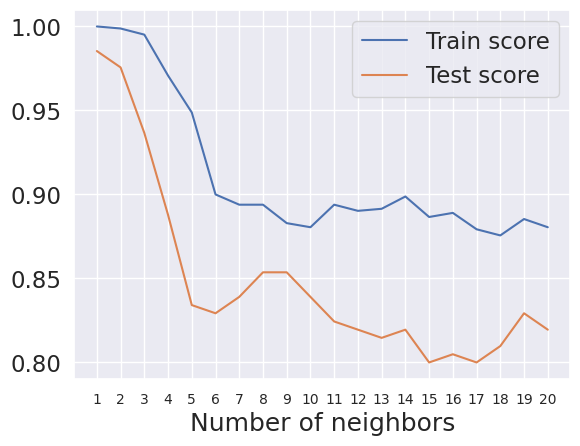

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1), fontsize=10)
plt.xlabel("Number of neighbors")
plt.ylabel
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV

###kita akan tuning LogisticRegression()

In [ ]:
# hyper parameter grid untuk LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# hyper parameter grid untuk RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf' : np.arange(1, 20, 2)
}

In [ ]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7951219512195122

### Lakukan hal yang sama pada RandomForestClassifier()

In [ ]:
np.random.seed(42)

# setup random hyperparameter
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# fit hyperparameter, untuk cari best model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [ ]:
rs_rf.score(X_test, y_test) # score untuk test

0.926829268292683

# Model Evaluation Setelah Hyperparameter Tuning
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

In [ ]:
# make predictions with tuned model (pake rf, karena akurasinya paling bagus)
y_preds = rs_rf.predict(X_test)

In [ ]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_test

,target
527,1
359,1
447,0
31,1
621,0
...,...
832,1
796,1
644,1
404,0


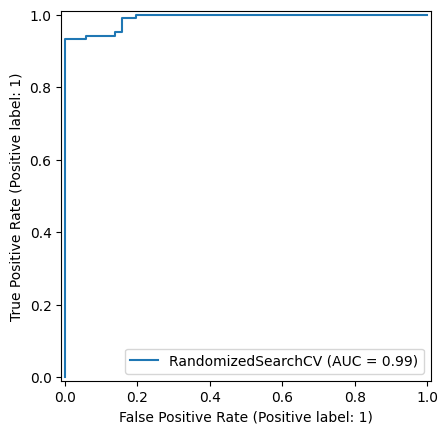

In [ ]:
# plot
RocCurveDisplay.from_estimator(estimator=rs_rf,
                               X=X_test,
                               y=y_test)

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[93  9]
 [ 6 97]]


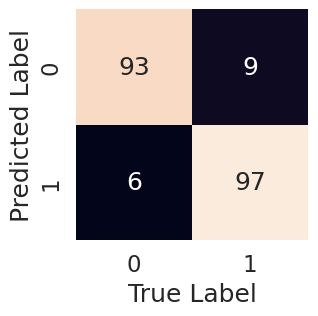

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)

  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')

plot_conf_mat(y_test, y_preds)

Interpretasi:

True Positive (TP) = 97
→ Model memprediksi 1, dan kenyataannya juga 1.

True Negative (TN) = 93
→ Model memprediksi 0, dan kenyataannya juga 0.

False Positive (FP) = 9
→ Model memprediksi 1, tetapi kenyataannya 0.

False Negative (FN) = 6
→ Model memprediksi 0, tetapi kenyataannya 1.



Classification Report, cross-validated precision, recall and f1-score

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.92      0.94      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



###Cross-Validation Metrics (Random Forest)

In [ ]:
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [ ]:
clf = RandomForestClassifier(n_estimators=510,min_samples_split=14, min_samples_leaf=1)

In [ ]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

cv_acc

array([0.99512195, 0.97073171, 0.98536585, 0.96097561, 0.94634146])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.9717073170731707)

In [ ]:
cv_precission = cross_val_score(clf, X, y, cv=5, scoring='precision')

cv_precission = np.mean(cv_precission)
cv_precission

np.float64(0.9645022993621124)

In [ ]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9715363881401619)

In [ ]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.9707675400406022)

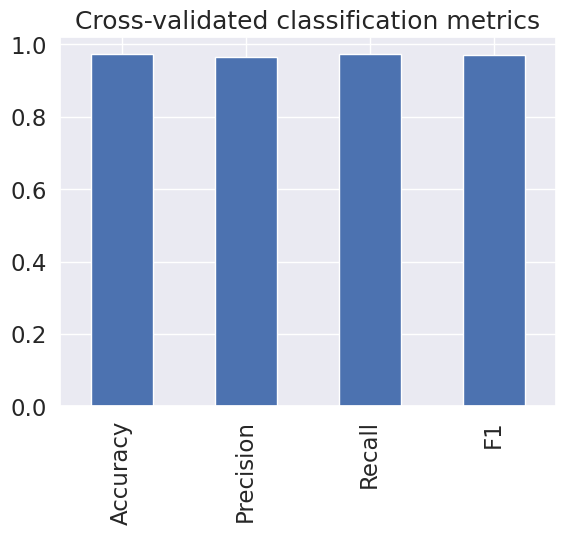

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precission,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}
cv_results = {}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for name, model in models.items():
    model_scores = {}
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(model, X_scaled, y, cv=kf, scoring=scorer)
        model_scores[metric_name] = {
            'Mean': round(np.mean(scores), 4),
            'Std': round(np.std(scores), 4)
        }
    cv_results[name] = model_scores

cv_summary = pd.DataFrame({
    model: {
        f"{metric} Mean": scores[metric]['Mean']
        for metric in scores
    } | {
        f"{metric} Std": scores[metric]['Std']
        for metric in scores
    }
    for model, scores in cv_results.items()
}).T

print(cv_summary)

                     Accuracy Mean  Precision Mean  Recall Mean  F1 Mean  \
Logistic Regression         0.8459          0.8217       0.8954   0.8560   
KNN                         0.8351          0.8526       0.8232   0.8369   
Random Forest               0.9961          1.0000       0.9924   0.9961   

                     Accuracy Std  Precision Std  Recall Std  F1 Std  
Logistic Regression        0.0150         0.0216      0.0418  0.0163  
KNN                        0.0181         0.0352      0.0232  0.0158  
Random Forest              0.0078         0.0000      0.0152  0.0078  


# Feature Importance

biar tau kalau ditanya "features mana yang berkontribusi terhadap pembangunan Model?"

In [ ]:
clf = RandomForestClassifier(n_estimators=510,min_samples_split=14, min_samples_leaf=1)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=14, n_estimators=510)

In [ ]:
clf.feature_importances_

array([0.06466829, 0.02787065, 0.15868834, 0.05700233, 0.05769459,
       0.00573285, 0.01027975, 0.11128971, 0.05522651, 0.12143744,
       0.04678292, 0.14461882, 0.1387078 ])

<Axes: title={'center': 'Feature Importances'}>

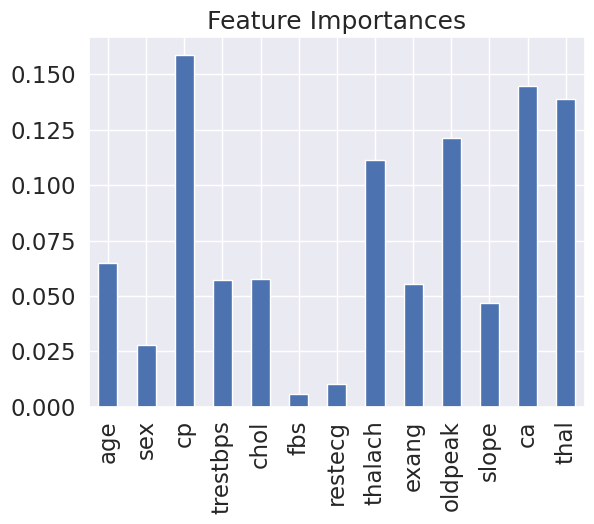

In [ ]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.plot.bar(title="Feature Importances")

Nilai yang lebih tinggi berarti fitur tersebut lebih berpengaruh terhadap prediksi penyakit jantung.

Fitur Paling Penting (kontribusi terbesar):

- cp (Chest Pain Type) → Ini adalah fitur paling berpengaruh terhadap prediksi.

- ca (Jumlah pembuluh darah utama yang terlihat)

- thal (Kondisi thalassemia)

- exang (Angina akibat olahraga)

- thalach (Denyut jantung maksimum)

- slope (Kemiringan segmen ST)

Fitur Kurang Penting:

- fbs (Fasting blood sugar) → Hampir tidak berpengaruh

- restecg (Hasil elektrokardiogram saat istirahat)

- sex (Jenis kelamin)

#Save the Model with  Pickle

In [ ]:
# import pickle

# with open('rf_heart_disease_classifications_model.pkl', 'wb') as file:
#   pickle.dump(clf, file)

# Unsupervised Learning

## KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X_unsup = df.drop("target", axis=1)

X_scaled_unsup = StandardScaler().fit_transform(X_unsup)

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled_unsup)

kmeans_silhouette = silhouette_score(X_scaled_unsup, kmeans_labels)
print("K-Means Silhouette Score:", round(kmeans_silhouette, 4))

K-Means Silhouette Score: 0.1687


Penjelasan K-Means:
- K-Means bekerja dengan mengelompokkan data ke dalam K cluster berdasarkan jarak terdekat ke centroid (titik pusat).

- Algoritma:

1. Pilih K titik centroid awal secara acak.

2. Kelompokkan data ke centroid terdekat (menggunakan jarak Euclidean).

3. Hitung ulang posisi centroid sebagai rata-rata dari semua titik dalam cluster.

4. Ulangi langkah 2–3 sampai posisi centroid tidak berubah banyak.

- Cocok untuk data yang bentuknya bulat/berkelompok jelas, tidak terlalu noisy.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled_unsup)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("DBSCAN Estimated Clusters:", n_clusters_dbscan)

if n_clusters_dbscan > 1:
    dbscan_silhouette = silhouette_score(X_scaled_unsup, dbscan_labels)
    print("DBSCAN Silhouette Score:", round(dbscan_silhouette, 4))
else:
    print("DBSCAN tidak membentuk cluster yang cukup untuk menghitung Silhouette Score.")

DBSCAN Estimated Clusters: 13
DBSCAN Silhouette Score: -0.211


Penjelasan DBSCAN:
- DBSCAN adalah algoritma berbasis kerapatan, bagus untuk data yang memiliki bentuk cluster tidak beraturan.

- Algoritma:

1. Untuk setiap titik, cari tetangga dalam radius eps.

2. Jika jumlah tetangga ≥ min_samples, titik tersebut adalah core point.

3. Cluster dibentuk dari core point dan semua titik yang dapat dijangkau secara kerapatan.

4. Titik yang tidak dapat dijangkau dari core point manapun dianggap sebagai noise (-1).

- Cocok untuk data dengan cluster tak beraturan, banyak outlier/noise.

## Evaluasi dengan metrik clustering (Silhouette & Rand Index)

In [ ]:
from sklearn.metrics import adjusted_rand_score

y_true = df["target"]

ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print("K-Means Adjusted Rand Index:", round(ari_kmeans, 4))
print("DBSCAN Adjusted Rand Index:", round(ari_dbscan, 4))

K-Means Adjusted Rand Index: 0.376
DBSCAN Adjusted Rand Index: 0.0068


## Visualisasi hasil clustering (dengan PCA)

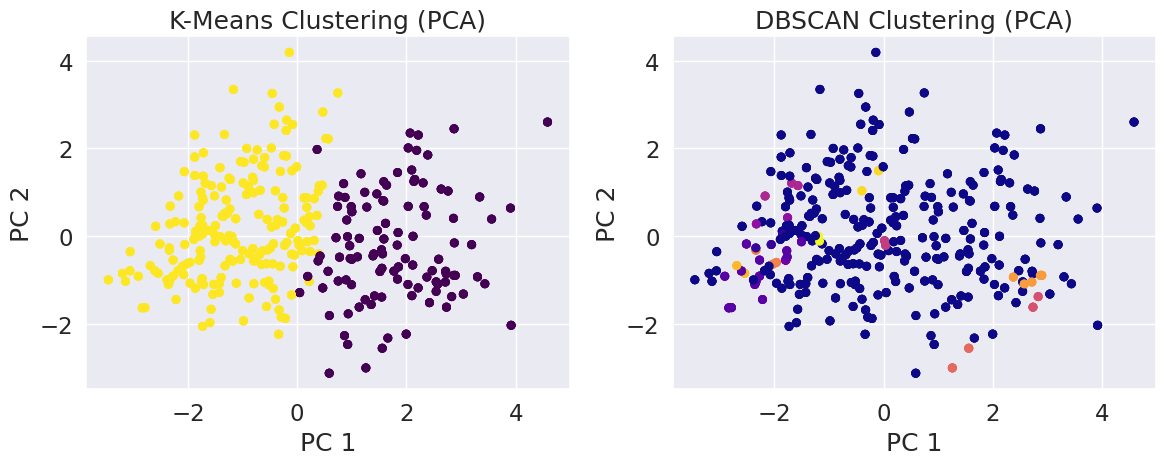

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_unsup)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title("K-Means Clustering (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', s=30)
plt.title("DBSCAN Clustering (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.show()

Visualisasi ini digunakan untuk memahami bagaimana algoritma unsupervised learning (clustering) seperti K-Means dan DBSCAN membagi data ke dalam kelompok-kelompok tanpa label.

Karena data asli memiliki banyak fitur, maka digunakan PCA (Principal Component Analysis) untuk mereduksi dimensi menjadi 2 komponen utama (PC1 dan PC2), sehingga bisa divisualisasikan dalam bentuk grafik 2D.

Hasil Clustering:

1. K-Means Clustering (PCA)

- Data berhasil terbagi menjadi 2 klaster utama (terlihat sebagai dua warna: kuning dan ungu).

- Klaster cukup terpisah dengan jelas secara visual, menandakan bahwa K-Means mampu mengelompokkan data dengan cukup baik berdasarkan informasi dua komponen utama PCA.

- Cocok digunakan jika data memiliki pola yang relatif simetris atau bentuk bundar (spherical clusters).

2. DBSCAN Clustering (PCA)

- Hasil clustering dari DBSCAN menunjukkan klaster yang lebih tersebar dan tidak beraturan.

- Ada beberapa titik dengan warna berbeda yang kemungkinan merupakan noise (outlier) atau titik yang tidak termasuk dalam klaster manapun.

- DBSCAN lebih cocok untuk data dengan bentuk klaster yang tidak beraturan dan dapat mengidentifikasi outlier, namun sensitif terhadap parameter eps dan min_samples.

Kesimpulan Visualisasi PCA:

- K-Means memberikan klaster yang lebih bersih dan terdefinisi secara visual dibanding DBSCAN.

- DBSCAN memberikan fleksibilitas dalam mendeteksi bentuk klaster yang tidak biasa dan noise, tapi hasilnya lebih kompleks untuk diinterpretasi.

- PCA membantu menyederhanakan data dan memberikan gambaran umum tentang bagaimana algoritma clustering bekerja terhadap data.

## Visualisasi hasil clustering (dengan t-SNE)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


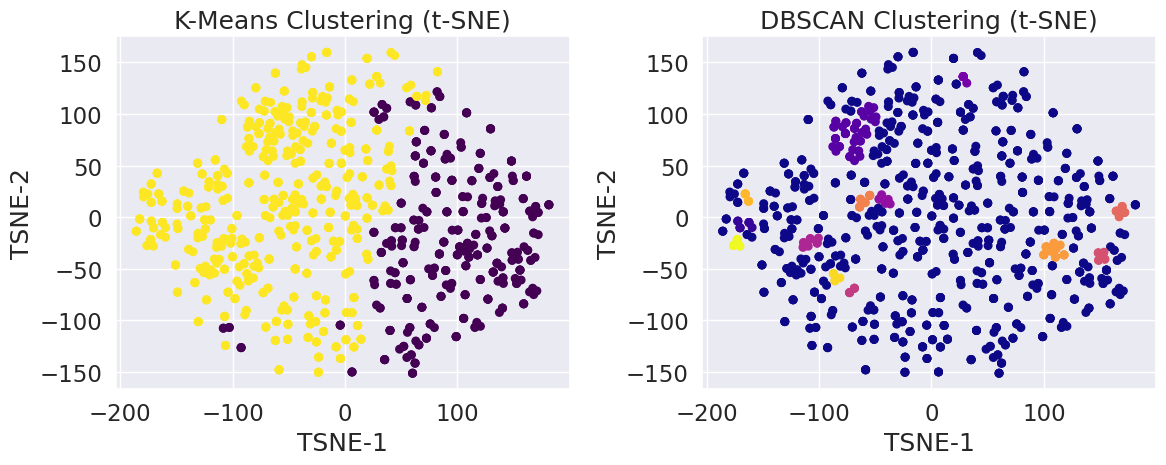

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled_unsup)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title("K-Means Clustering (t-SNE)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='plasma', s=30)
plt.title("DBSCAN Clustering (t-SNE)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")

plt.tight_layout()
plt.show()


1. K-Means Clustering (t-SNE)
- Terbentuk dua kelompok dominan yang relatif simetris.

- Klaster cukup jelas terlihat dan terpisah secara spasial, walau ada sedikit tumpang tindih di batas antar cluster.

- Warna kuning dan ungu menunjukkan label klaster hasil K-Means.

- t-SNE menunjukkan bahwa K-Means berhasil mengelompokkan sebagian besar data dengan cukup baik, tetapi masih ada titik-titik yang mungkin tidak konsisten.

2. DBSCAN Clustering (t-SNE)
- DBSCAN menghasilkan klaster yang lebih kompleks, dengan banyak warna yang tersebar.

- Beberapa titik diwarnai berbeda (merah/oranye) yang menunjukkan noise atau outlier, hal yang memang menjadi kekuatan DBSCAN.

- Secara umum, hasil clustering kurang terstruktur dibanding K-Means.

- t-SNE menunjukkan bahwa meskipun DBSCAN bisa menangani bentuk klaster yang tidak teratur, dalam data ini ia tidak membentuk klaster yang konsisten secara visual.

| Algoritma   | Keterangan                                                                   |
| ----------- | ---------------------------------------------------------------------------- |
| **K-Means** | Klaster terlihat **lebih terdefinisi**, lebih cocok untuk struktur data ini. |
| **DBSCAN**  | Menghasilkan lebih banyak noise, kurang rapi, dan **klaster tersebar**.      |
| **t-SNE**   | Memberikan **visualisasi spasial yang lebih informatif** dibanding PCA.      |


## Model Comparison

### **Hasil Evaluasi Clustering**

| Metrik                        | K-Means                 | DBSCAN                    |
| ----------------------------- | ----------------------- | ------------------------- |
| **Silhouette Score**          | **0.1687**              | -0.211                    |
| **Adjusted Rand Index (ARI)** | **0.376**               | 0.0068                    |
| **Jumlah Cluster**            | 2 (sesuai `n_clusters`) | 13 (otomatis dari DBSCAN) |


### **Interpretasi Hasil**

#### **K-Means**

* **Silhouette Score = 0.1687**

  * Angka ini menunjukkan *struktur cluster yang lemah*. Artinya data tidak terkelompok sangat jelas, tapi masih lebih baik daripada DBSCAN.
* **Adjusted Rand Index = 0.376**

  * Ini adalah korelasi antara hasil clustering dengan label asli. Nilai ini cukup lumayan untuk clustering tanpa supervisi, menunjukkan bahwa **sebagian besar label berhasil dipetakan ke cluster yang sesuai**.

#### **DBSCAN**

* **Silhouette Score = -0.211**

  * Nilai negatif menunjukkan bahwa banyak titik lebih dekat ke cluster lain dibanding ke cluster-nya sendiri. Ini menandakan **struktur cluster yang buruk atau banyak outlier/noise**.
* **Adjusted Rand Index = 0.0068**

  * Sangat rendah. Ini berarti hasil clustering DBSCAN hampir **tidak berkorelasi sama sekali dengan label asli**. Hal ini bisa disebabkan oleh:

    * Parameter `eps` dan `min_samples` yang tidak optimal.
    * DBSCAN sangat sensitif terhadap parameter dan skala data.





#### **Kesimpulan Perbandingan Sementara Pada Unsupervised Learning**

| Aspek                           | K-Means                                        | DBSCAN                                        |
| ------------------------------- | ---------------------------------------------- | --------------------------------------------- |
| **Cocok untuk cluster yang...** | Berbentuk bulat & seimbang                     | Tidak beraturan, ada noise                    |
| **Parameter utama**             | `n_clusters`                                   | `eps`, `min_samples`                          |
| **Performa pada data ini**      | **Jauh lebih baik (baik ARI & silhouette)** | Kurang baik, perlu tuning eps/min\_samples |
| **Jumlah cluster**              | Ditetapkan manual (2)                          | Dihitung otomatis (hasil: 13)                 |




* Untuk dataset heart ini, **K-Means lebih efektif** dibandingkan DBSCAN.
* Jika ingin menggunakan DBSCAN, perlu dilakukan:

  * **Tuning parameter `eps` dan `min_samples`** menggunakan Grid Search atau evaluasi visual.
  * Coba juga **reducer dimensi** (PCA atau t-SNE) untuk membantu clustering DBSCAN.



# Kesimpulan

## **Perbandingan Supervised vs Unsupervised Learning**

| Aspek                  | Supervised Learning                            | Unsupervised Learning                         |
| ---------------------- | ---------------------------------------------- | --------------------------------------------- |
| **Label Data**         | Membutuhkan label (target sudah diketahui)     | Tidak membutuhkan label                       |
| **Tujuan Utama**       | Prediksi dan klasifikasi                       | Eksplorasi struktur dan pola data             |
| **Akurasi Model**      | Umumnya lebih tinggi bila label tersedia       | Umumnya lebih rendah karena tidak ada label   |
| **Evaluasi**           | Jelas: accuracy, precision, recall, F1, MCC    | Lebih sulit: clustering score, silhoutte      |
| **Kapan Lebih Unggul** | Saat data berlabel tersedia dan target penting | Saat data belum dilabeli atau eksplorasi awal |

### **Kapan Supervised Learning Lebih Cocok?**

* Saat kita **mempunyai label/class** seperti "punya penyakit jantung" atau tidak.
* Ketika **tujuan utama adalah klasifikasi/prediksi**.
* Cocok untuk **aplikasi nyata seperti diagnosa penyakit**, karena hasilnya bisa diinterpretasikan langsung (misalnya, pasien A kemungkinan besar sakit).
* Dapat mengevaluasi model secara kuantitatif (akurasi, recall, dll).

**Contoh:** Dataset heart disease, karena kita punya kolom `target` sebagai label (1 = sakit, 0 = tidak).

### **Kapan Unsupervised Learning Lebih Cocok?**

* Saat **label belum tersedia**, misalnya data mentah dari survei atau sensor.
* Untuk **eksplorasi pola tersembunyi**, seperti segmentasi pasien atau deteksi anomali.
* Ketika kita ingin mengetahui **kelompok pasien dengan pola serupa** meskipun belum tahu diagnosis pastinya.

**Contoh:** Awal pengumpulan data pasien baru yang belum ada diagnosis medis.





## **Refleksi Terhadap Dataset Heart Disease**

* Dataset ini **memiliki label target (0 = tidak sakit, 1 = sakit)** → **Supervised Learning** jelas lebih cocok.
* Kita bisa melakukan klasifikasi langsung dan mengevaluasi performanya.
* **Random Forest** menghasilkan skor **sangat tinggi (Accuracy = 0.9854, Precision = 1.0)** → menandakan model ini mampu **mendeteksi penyakit dengan sangat baik tanpa false positive**.
* **Recall tinggi di Logistic Regression dan KNN** juga berguna dalam konteks kesehatan: lebih baik memberikan "alarm palsu" (false positive) daripada gagal mendeteksi pasien sakit (false negative).


## **Kesimpulan Akhir**

- Untuk dataset **heart disease**, **supervised learning adalah pendekatan terbaik** karena:
1. Kita punya label diagnosis.
2. Model bisa dilatih untuk prediksi akurat dan diuji dengan metrik standar.
3. Model seperti Random Forest terbukti sangat efektif.

- **Unsupervised learning bisa menjadi pelengkap**, misalnya untuk **clustering** pasien dengan gejala mirip, **sebelum diagnosis ditegakkan**, atau dalam studi eksploratif.